In [28]:

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
iris_data = pd.read_csv('/content/drive/My Drive/Infosys ML Course/iris.csv')
iris_data.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


# Feature Engineering
Create a new column in the dataframe (v_nv), that distinguishes the species - 'versicolor'(marked by 0) from rest. Then, build binary classifier based on this new column.



In [29]:
#creating new column 'v_nv', to distinguish versicolor species from rest

#the below lambda function returns 0 for 'versicolor' species and returns 1 for rest.

v_nv_fn = lambda x: 0 if x=="versicolor" else 1

# new column added into dataframe
iris_data["v_nv"] = iris_data["Species"].apply(v_nv_fn)
# iris_data[iris_data['v_nv']==0].head()

iris_data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,setosa,1
1,4.9,3.0,1.4,0.2,setosa,1
2,4.7,3.2,1.3,0.2,setosa,1
3,4.6,3.1,1.5,0.2,setosa,1
4,5.0,3.6,1.4,0.2,setosa,1


In [30]:
iris_data['Species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

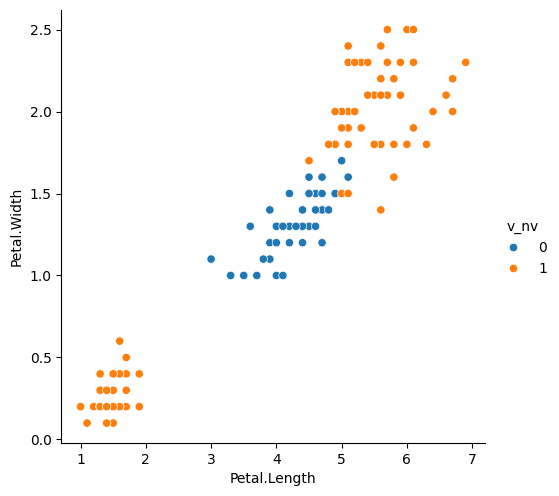

In [31]:
#visualization using seaborn - pairplot

import seaborn as sns
sns.pairplot(iris_data, x_vars = "Petal.Length", y_vars = "Petal.Width", hue = "v_nv", height=5)

In the above plot, you can find the separating hyperplane to classify data as versicolor and non-versicolor. You can observe that the data is not linearly separable i.e, it cannot be separated using a straight line.



# Model Creation

In [32]:
from sklearn.svm import SVC
x = iris_data[['Petal.Length','Petal.Width']]
y = iris_data['v_nv']

model = SVC()
model.fit(x,y)
model.score(x,y)

0.9533333333333334

Model Visualization

A separating hyperplane that divides the iris dataset into versicolor and non-versicolor categories, looks as shown below.

Note:'mlxtend' is another machine learning library and provides various useful tools for data science applications.

Here, plot_decision_regions() function of mlxtend library is used for plotting the decision regions.



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Decision Regions')

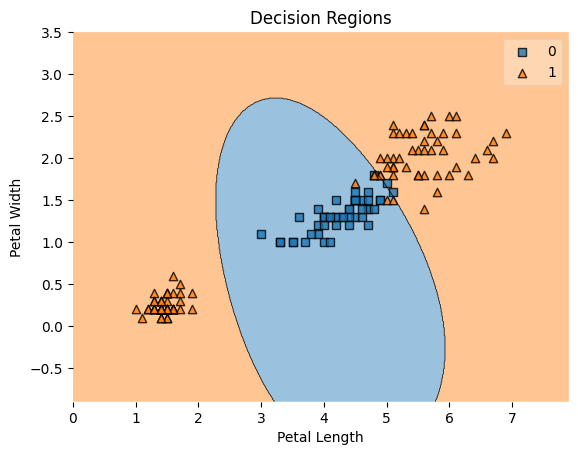

In [33]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import matplotlib.pyplot as plt


fetures = np.array(x)
target = np.array(y).ravel() # makes target variable to be 1D array

plot_decision_regions(fetures, target, clf=model)

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Decision Regions')


# Multi-class Classification

Feature Engineering

You can encode the species column with numerical values. And replace label 'setosa' with '0', 'versicolor' with '1' and 'virginica' with '2'. This encoding technique, of converting distinct values of column into unique numbers is called 'label encoding'.

In [34]:
# encoding the species column
iris_data.loc[iris_data.Species=="setosa","Species"] = 0
iris_data.loc[iris_data.Species=="versicolor","Species"] = 1
iris_data.loc[iris_data.Species=="virginica","Species"] = 2

#data type (dtype) of the column will be converted to 'category'
iris_data.Species = iris_data.Species.astype("category")

iris_data.head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species,v_nv
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1


In [35]:
iris_data.shape


(150, 6)

In [36]:
X = iris_data[["Petal.Length","Petal.Width"]]
Y = iris_data["Species"]
model = SVC()
model.fit(X,Y)


SVC()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, 'Multiclass classification on iris using SVM')

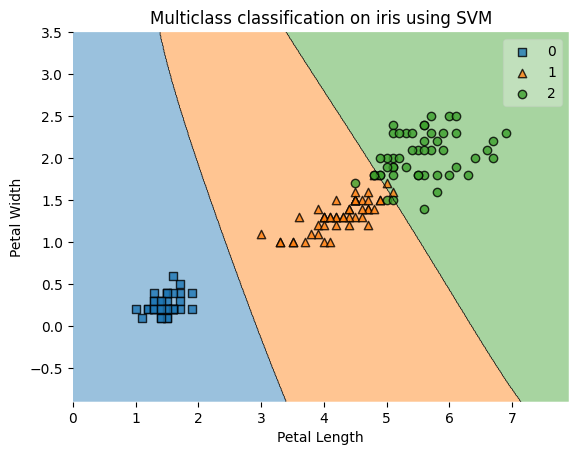

In [37]:
from mlxtend.plotting import plot_decision_regions

features = np.array(X)
target = np.array(Y)

plot_decision_regions(features, target, clf=model)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Multiclass classification on iris using SVM')